# Analisis Penjualan PT ABC di Amerika Serikat Periode 2014-2017
Oleh: Elisa Hariyanti

[link dashboard visual](https://public.tableau.com/app/profile/elisa.hariyanti/viz/ResumePenjualanPTABC/Dashboard1?publish=yes)

[link github](https://github.com/elisahry/Penjualan-PT-ABC/)

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from datetime import datetime

import plotly.express as px    
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

## Load Dataset

In [50]:
cust = pd.read_csv('cst_data.csv')
cust

,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
2,CM-12655,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
3,AS-10240,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
4,HE-14800,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
...,...,...,...,...,...,...,...,...
9989,HE-16797,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South
9990,CG-14518,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9991,DV-15043,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9992,CM-14653,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West


In [5]:
order = pd.read_csv('order_data.csv')
order

,Customer ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Price
0,CG-12520,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1091
1,DV-13045,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2979
2,CM-12655,6/12/2016,6/16/2016,Second Class,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1289
3,AS-10240,10/11/2015,10/18/2015,Standard Class,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1002
4,HE-14800,10/11/2015,10/18/2015,Standard Class,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,3068
...,...,...,...,...,...,...,...,...,...
9989,HE-16797,1/21/2014,1/23/2014,Second Class,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,1157
9990,CG-14518,2/26/2017,3/3/2017,Standard Class,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,3678
9991,DV-15043,2/26/2017,3/3/2017,Standard Class,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2368
9992,CM-14653,2/26/2017,3/3/2017,Standard Class,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",1001


In [54]:
# Cek jumlah ID unik di kedua dataset
print("Number of unique in cst_data:", cust['Customer ID'].nunique())
print("Number of unique in order_data:", order['Customer ID'].nunique())

# Cek apakah semua Customer ID di cst_data.csv ada di order_data.csv
all_customers_in_orders = set(cust['Customer ID']) == set(order['Customer ID'])
print(f"Apakah semua Customer ID di cst_data.csv ada di order_data.csv? {all_customers_in_orders}")

# Cek jumlah transaksi per pelanggan di order_data.csv
transaction_counts = order['Customer ID'].value_counts()
print(transaction_counts.describe())

Number of unique in cst_data: 9994
Number of unique in order_data: 9994
Apakah semua Customer ID di cst_data.csv ada di order_data.csv? True
count    9994.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: count, dtype: float64


Pada dataset `cst_data.csv` dan `order_data.csv`, pada kolom Customer ID memiliki jumlah ID unik yang sama yaitu 9994. Sehingga dapat disimpulkan bahwa:

1. Setiap Customer ID di cst_data.csv juga ada di order_data.csv
Ini menunjukkan bahwa setiap pelanggan yang terdaftar dalam dataset pelanggan (cst_data.csv) telah melakukan setidaknya satu transaksi yang tercatat dalam dataset pesanan (order_data.csv). Artinya, tidak ada pelanggan di cst_data.csv yang tidak melakukan pesanan. Tidak ada duplikasi dalam Customer ID di kedua dataset

2. Jumlah unik Customer ID di kedua dataset sama persis
Hal ini berarti tidak ada ID pelanggan yang muncul lebih dari satu kali secara keseluruhan. Ini memperlihatkan bahwa dataset sudah difilter atau bersih Bisa jadi dataset ini sudah melalui proses pembersihan sehingga hanya menyisakan pelanggan yang benar-benar melakukan transaksi.

3. Hubungan One-to-One antara pelanggan dan transaksi
Karena order_data.csv hanya mencatat satu transaksi per pelanggan, maka hubungan antara pelanggan dan pesanan bersifat one-to-one.

4. Dengan nilai min dan max sama dengan 1, berarti setiap pelanggan hanya melakukan satu transaksi.

Jadi, kesimpulan awal adalah bahwa setiap pelanggan yang ada dalam dataset pelanggan juga memiliki setidaknya satu transaksi dalam dataset pesanan, dan jumlah uniknya sama.

## Marge Dataset

Untuk mempermudah analisis, maka kedua dataset yang tersedia akan di-merge dengan key value adalah __Customer ID__.

In [10]:
merged_data = order.merge(cust, on="Customer ID", how="left")

In [11]:
merged_data

,Customer ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Price,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1091,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2979,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
2,CM-12655,6/12/2016,6/16/2016,Second Class,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1289,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
3,AS-10240,10/11/2015,10/18/2015,Standard Class,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1002,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
4,HE-14800,10/11/2015,10/18/2015,Standard Class,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,3068,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,HE-16797,1/21/2014,1/23/2014,Second Class,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,1157,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South
9990,CG-14518,2/26/2017,3/3/2017,Standard Class,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,3678,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9991,DV-15043,2/26/2017,3/3/2017,Standard Class,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2368,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9992,CM-14653,2/26/2017,3/3/2017,Standard Class,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",1001,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West


Setelah dataset digabungkan, akan diidentifikasi apakah terdapat missing value pada dataset. Selain itu akan dilihat juga jumlah unique value dari setiap kolom yang tersedia.

In [19]:
pd.set_option('display.max_colwidth', None)

list_unique = []
for col in merged_data.columns :
    list_unique.append([col, merged_data[col].isnull().sum(), merged_data[col].nunique(), merged_data[col].unique()])

tabel_unique = pd.DataFrame(columns=['Column Name', 'Number of Missing Value', 'Number of Unique', 'Unique Value'],
                     data=list_unique)
tabel_unique

Column Name  Number of Missing Value  Number of Unique  \
0     Customer ID                        0              9994   
1      Order Date                        0              1237   
2       Ship Date                        0              1334   
3       Ship Mode                        0                 4   
4      Product ID                        0              1862   
5        Category                        0                 3   
6    Sub-Category                        0                17   
7    Product Name                        0              1850   
8           Price                        0              3705   
9   Customer Name                        0               793   
10        Segment                        0                 3   
11        Country                        0                 1   
12           City                        0               531   
13          State                        0                49   
14    Postal Code                        0               631   
15         Region                        0                 4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [20]:
# cek duplikasi data
merged_data.duplicated().sum()

0

In [55]:
# statistika deskriptif
merged_data.describe(include="all")

,Customer ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Price,Customer Name,Segment,Country,City,State,Postal Code,Region
count,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994
unique,9994,NaN,NaN,4,1862,3,17,1850,NaN,793,3,1,531,49,NaN,4
top,CG-12520,NaN,NaN,Standard Class,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,William Brown,Consumer,United States,New York City,California,NaN,West
freq,1,NaN,NaN,5968,19,6026,1523,48,NaN,37,5191,9994,915,2001,NaN,3203
mean,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,2997.846408,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN
min,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN
25%,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,1983.250000,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN
50%,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,2999.500000,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN
75%,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,3998.750000,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN
max,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN


In [56]:
# melihat tipe data dari masing-masing kolom
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer ID    9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Product ID     9994 non-null   object        
 5   Category       9994 non-null   object        
 6   Sub-Category   9994 non-null   object        
 7   Product Name   9994 non-null   object        
 8   Price          9994 non-null   int64         
 9   Customer Name  9994 non-null   object        
 10  Segment        9994 non-null   object        
 11  Country        9994 non-null   object        
 12  City           9994 non-null   object        
 13  State          9994 non-null   object        
 14  Postal Code    9994 non-null   int64         
 15  Region         9994 n

Untuk mempermudah analisis, maka tipe data pada kolom __Order Date__ dan __Ship Date__ akan diubah menjadi tipe data _datetime_.

In [26]:
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'], format="%m/%d/%Y")
merged_data

,Customer ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Price,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,2016-11-08,11/11/2016,Second Class,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1091,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,2016-11-08,11/11/2016,Second Class,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",2979,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
2,CM-12655,2016-06-12,6/16/2016,Second Class,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,1289,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
3,AS-10240,2015-10-11,10/18/2015,Standard Class,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1002,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
4,HE-14800,2015-10-11,10/18/2015,Standard Class,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,3068,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,HE-16797,2014-01-21,1/23/2014,Second Class,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,1157,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South
9990,CG-14518,2017-02-26,3/3/2017,Standard Class,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,3678,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9991,DV-15043,2017-02-26,3/3/2017,Standard Class,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2368,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9992,CM-14653,2017-02-26,3/3/2017,Standard Class,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",1001,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West


In [27]:
merged_data['Ship Date'] = pd.to_datetime(merged_data['Ship Date'], format="%m/%d/%Y")
merged_data

,Customer ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Price,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,2016-11-08,2016-11-11,Second Class,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1091,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,2016-11-08,2016-11-11,Second Class,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",2979,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
2,CM-12655,2016-06-12,2016-06-16,Second Class,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,1289,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
3,AS-10240,2015-10-11,2015-10-18,Standard Class,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1002,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
4,HE-14800,2015-10-11,2015-10-18,Standard Class,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,3068,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,HE-16797,2014-01-21,2014-01-23,Second Class,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,1157,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South
9990,CG-14518,2017-02-26,2017-03-03,Standard Class,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,3678,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9991,DV-15043,2017-02-26,2017-03-03,Standard Class,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2368,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West
9992,CM-14653,2017-02-26,2017-03-03,Standard Class,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",1001,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West


In [57]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer ID    9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Product ID     9994 non-null   object        
 5   Category       9994 non-null   object        
 6   Sub-Category   9994 non-null   object        
 7   Product Name   9994 non-null   object        
 8   Price          9994 non-null   int64         
 9   Customer Name  9994 non-null   object        
 10  Segment        9994 non-null   object        
 11  Country        9994 non-null   object        
 12  City           9994 non-null   object        
 13  State          9994 non-null   object        
 14  Postal Code    9994 non-null   int64         
 15  Region         9994 n

Tipe data sudah berhasil diubah. Selanjutnya dataset yang telah digabungkan sebelumnya, akan disimpan dalam bentuk csv.

In [29]:
# simpan dataset yang telah digabungkan
merged_data.to_csv('merged_data.csv', index=False)

## Analisis Penjualan

### Analisis Total Penjualan Berdasarkan Category

Pada dataset ini terdapat Category dan Sub-Category produk, yang mengelompokkan produk berdasarkan jenisnya. Category merupakan kelompok utama produk, sedangkan Sub-Category adalah pembagian lebih rinci dalam kategori tersebut. Berikut merupakan tabel Category dan Sub-Category produk.

| Category | Sub-Category |
| -------- | ------------ |
| Office Supplies | 'Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper', 'Envelopes', 'Fasteners', 'Supplies' |
| Furniture | 'Bookcases', 'Chairs', 'Tables', 'Furnishings' |
| Technology | 'Phones', 'Accessories', 'Machines', 'Copiers' |

Untuk memahami performa penjualan, dilakukan analisis total penjualan berdasarkan Category dan Sub-Category. Ini bertujuan untuk melihat kategori produk mana yang paling laris dan memiliki kontribusi terbesar terhadap total pendapatan. Total pendapatan yang tertera merupakan jumlah revenue yang didapatkan berdasarkan kolom __Price__.

C:\Users\Dafa\AppData\Local\Temp\ipykernel_25048\2041819095.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Total_Sales', data=category_summary, palette=colors)


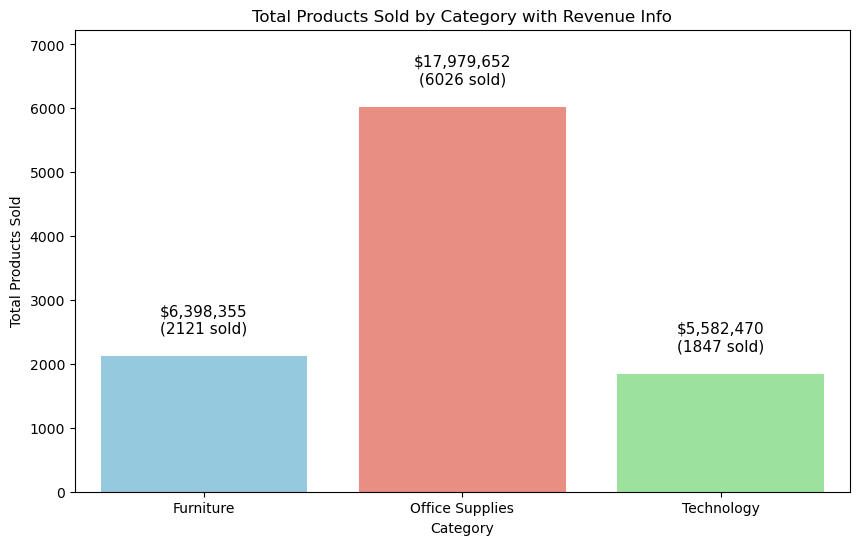

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total revenue (Price) dan total produk terjual (jumlah baris)
category_summary = merged_data.groupby('Category').agg(
    Total_Revenue=('Price', 'sum'),   # Total revenue (pendapatan)
    Total_Sales=('Category', 'count')  # Total jumlah produk terjual (jumlah baris)
).reset_index()

# Warna unik untuk setiap kategori
colors = ['skyblue', 'salmon', 'lightgreen']

# Membuat figure dan axes
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Total_Sales', data=category_summary, palette=colors)

# Menentukan batas atas sumbu Y (lebih panjang)
y_max = category_summary['Total_Sales'].max() * 1.2  # Tambahkan 30% dari nilai tertinggi
plt.ylim(0, y_max)

# Menambahkan keterangan Total Revenue & Total Sales di atas bar
for index, row in category_summary.iterrows():
    plt.text(index, row.Total_Sales + (y_max * 0.05),  # Geser teks lebih ke atas
             f"${row.Total_Revenue:,.0f}\n({row.Total_Sales} sold)", 
             ha='center', fontsize=11, color='black')

# Menyesuaikan tampilan
plt.xlabel('Category')
plt.ylabel('Total Products Sold')
plt.title('Total Products Sold by Category with Revenue Info')
plt.xticks(rotation=0)

plt.show()

Dari grafik batang di atas, terdapat beberapa poin analisis, yaitu:
1. Total Pendapatan dan Produk Terjual:
- Office Supplies: Menghasilkan pendapatan sebesar $17,979,652 dengan 6,026 produk terjual. Ini menjadikan kategori dengan pendapatan tertinggi dan penjualan terbanyak.
- Technology: Menghasilkan pendapatan sebesar $5,582,470 dengan 1,847 produk terjual. Kategori ini memiliki pendapatan dan jumlah produk terjual yang paling rendah di antara ketiga kategori.
- Furniture: Menghasilkan pendapatan sebesar $6,398,355 dengan 2,121 produk terjual. 

2. Implikasi Bisnis:
- Kategori Office Supplies dapat menjadi fokus utama untuk strategi penjualan dan pemasaran karena kontribusinya yang signifikan terhadap pendapatan.
- Ketegori Furniture meskipun memiliki jumlah produk terjual yang lebih sedikit, memberikan pendapatan yang cukup besar, menunjukkan potensi untuk meningkatkan volume penjualan.
- Untuk kategori Technology, diperlukan strategi khusus untuk meningkatkan penjualan dan pendapatan, seperti promosi atau diversifikasi produk.

Secara keseluruhan, grafik ini menunjukkan bahwa Office Supplies adalah kategori yang paling menguntungkan, sementara Furniture memiliki potensi untuk meningkatkan pendapatan lebih lanjut. Selanjutnya Technology memerlukan perhatian lebih untuk dapat meningkatkan pendapatan dan jumlah penjualannya.

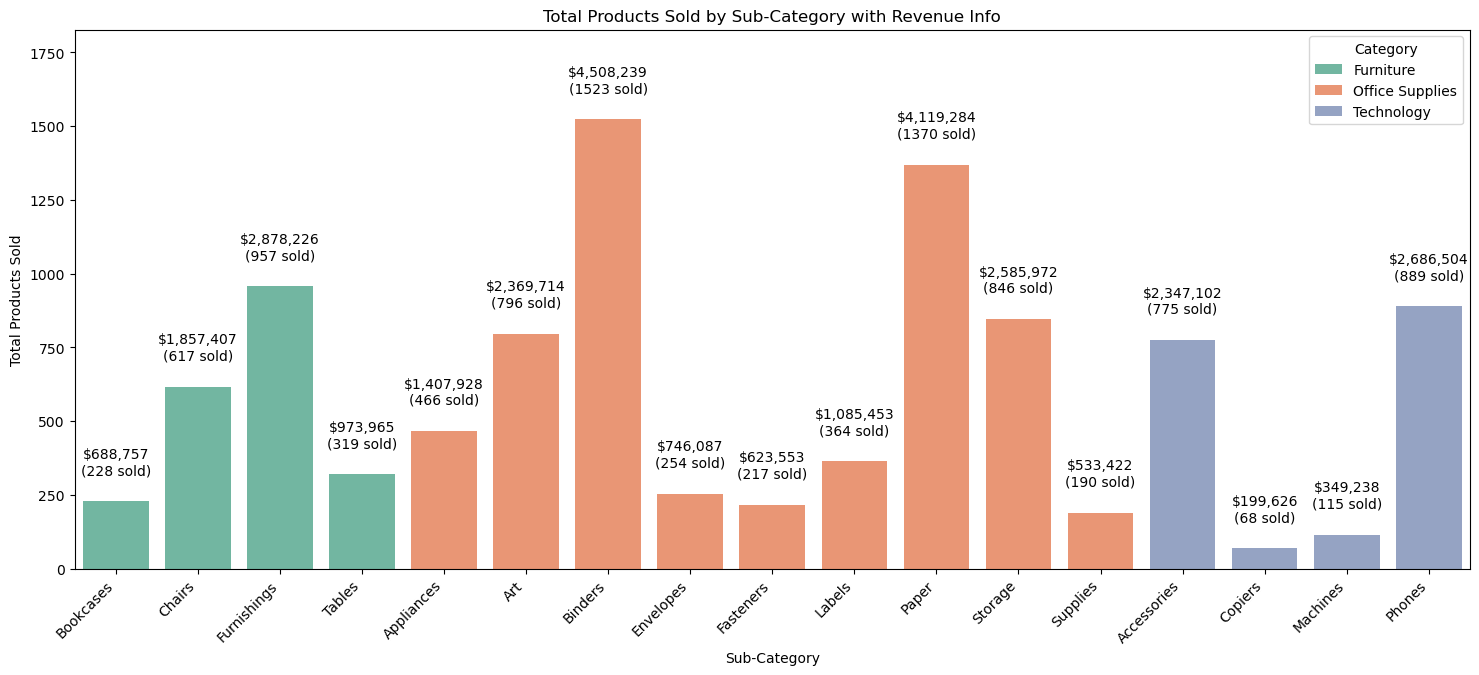

In [87]:
# Hitung total revenue (Price) dan total produk terjual (jumlah baris) per sub-category
subcategory_summary = merged_data.groupby(['Category', 'Sub-Category']).agg(
    Total_Revenue=('Price', 'sum'),   # Total revenue (pendapatan)
    Total_Sales=('Sub-Category', 'count')  # Total jumlah produk terjual (jumlah baris)
).reset_index()

# Warna unik untuk setiap kategori
colors = sns.color_palette("Set2", n_colors=subcategory_summary['Category'].nunique())

# Membuat figure dan axes
plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Sub-Category', y='Total_Sales', data=subcategory_summary, palette=colors, hue='Category')

# Menentukan batas atas sumbu Y (lebih panjang)
y_max = subcategory_summary['Total_Sales'].max() * 1.2  # Tambahkan 30% dari nilai tertinggi
plt.ylim(0, y_max)

# Menambahkan keterangan Total Revenue & Total Sales di atas bar
for index, row in subcategory_summary.iterrows():
    plt.text(index, row.Total_Sales + (y_max * 0.05),  # Geser teks lebih ke atas
             f"${row.Total_Revenue:,.0f}\n({row.Total_Sales} sold)", 
             ha='center', fontsize=10, color='black')

# Menyesuaikan tampilan
plt.xlabel('Sub-Category')
plt.ylabel('Total Products Sold')
plt.title('Total Products Sold by Sub-Category with Revenue Info')
plt.xticks(rotation=45, ha='right')  # Agar label X tidak tumpang tindih
plt.legend(title='Category')

plt.show()

- Pada kategori Furniture, sub-kategori Furninshings memiliki penjualan terbanyak yaitu 957 dengan total sales $2.878.226. Sedangkan sub-kategori Bookcase dengan penjualan 228 dan total sales $688.757.
- Untuk kategori Office Supplies, Binders menempati posisi pertama dengan penjualan terbanyak yaitu 1523 unit dengan total sales $4.508.239, sedangkan di posisi terakhir ada Fasteners dengan penjualan 254 dan total sales $623.553.
- Kategori Technology, Phones merupakan penjualan tertinggi dengan 889 unit terjual dan total sales $2.686.504. Sedangakn Copiers hanya terjual sebanyak 68 unit dengan total sales $199.626.

Rekomendasi:
1. Furniture
    - Furnishings mendominasi penjualan dengan 957 unit terjual dan $2.878.226 total sales. Bisnis dapat mempertimbangkan untuk mengembangkan variasi produk dalam sub-kategori Furnishings agar terus menarik lebih banyak pelanggan.
    - Bookcase, yang memiliki penjualan lebih rendah (228 unit), dapat diberikan promosi khusus atau dipromosikan lebih intensif untuk meningkatkan penjualan. Selain itu, bisa mengeksplorasi desain atau fitur yang lebih menarik untuk menarik minat pelanggan.

2. Office Supplies:
    - Binders menjadi sub-kategori dengan penjualan tertinggi (1.523 unit), dan total sales yang besar ($4.508.239). Bisnis dapat mempertimbangkan untuk menjaga keberagaman varian produk Binders dan meningkatkan strategi pemasaran untuk mempertahankan posisinya.
    - Fasteners, yang memiliki penjualan rendah (254 unit), perlu mendapatkan peningkatan promosi atau pendekatan pemasaran yang lebih kuat, serta menilai apakah ada peluang untuk inovasi produk atau bundling dengan produk lain yang lebih populer.

3. Technology:
    - Phones adalah sub-kategori unggulan di kategori ini, dengan penjualan yang cukup besar (889 unit) dan total sales yang signifikan ($2.686.504). Untuk menjaga posisi ini, bisnis bisa menawarkan varian terbaru atau diskon musiman untuk menarik pelanggan.
    - Copiers, dengan penjualan rendah (68 unit), perlu evaluasi lebih lanjut apakah ada kebutuhan pasar yang dapat dipenuhi dengan cara menurunkan harga atau meningkatkan kampanye pemasaran agar lebih dikenal.

### Tren Penjualan Berdasarkan Waktu

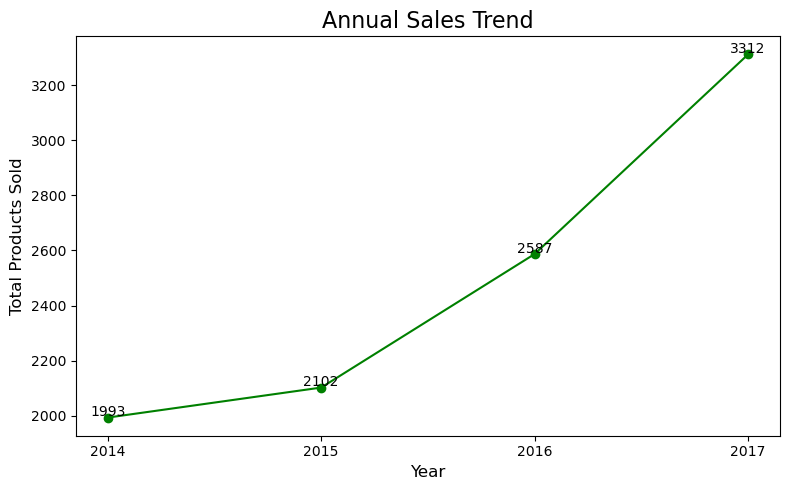

In [103]:
# Tambahkan kolom Tahun untuk analisis tren
merged_data['Year'] = merged_data['Order Date'].dt.year

# Hitung jumlah produk terjual per tahun (Total Sales)
annual_sales = merged_data.groupby('Year').agg(
    Total_Sales=('Category', 'count')  # Hitung jumlah produk terjual per tahun
).reset_index()

# Membuat grafik Tren Penjualan per Tahun
plt.figure(figsize=(8, 5))
plt.plot(annual_sales['Year'], annual_sales['Total_Sales'], marker='o', linestyle='-', color='g')

# Menambahkan jumlah penjualan di atas setiap titik
for i, row in annual_sales.iterrows():
    plt.text(row['Year'], row['Total_Sales'] + 5, f"{row['Total_Sales']}", ha='center', fontsize=10)

# Menambahkan label dan judul
plt.title('Annual Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Products Sold', fontsize=12)

# Menyesuaikan label X agar hanya tampilkan tahun penuh
plt.xticks(annual_sales['Year'], rotation=0)

# Menampilkan grafik
plt.tight_layout()
plt.show()

- Terdapat peningkatan yang konsisten dalam jumlah produk terjual setiap tahun. Dari 1,993 produk pada 2014, angka ini meningkat menjadi 3,312 produk pada 2017. Peningkatan terbesar terjadi antara 2016 dan 2017, yang menunjukkan pertumbuhan signifikan di tahun terakhir.
- Dengan peningkatan setiap tahun, tren penjualan menunjukkan bahwa ada permintaan yang terus berkembang untuk produk yang dijual, baik karena peningkatan daya beli pelanggan maupun keberhasilan strategi pemasaran dan distribusi.

Rekomendasi:
- Untuk mempertahankan momentum positif ini, maka bisnis harus fokus pada strategi yang berhasil pada tahun-tahun sebelumnya dan memperkuatnya lebih lanjut untuk memastikan pertumbuhan penjualan yang berkelanjutan. Promosi lebih intensif atau perluasan jangkauan pasar bisa menjadi kunci untuk mempertahankan momentum ini.
- Tahun 2017 menunjukkan peningkatan yang sangat besar dibandingkan tahun sebelumnya. Bisnis dapat mengevaluasi strategi pemasaran dan distribusi yang digunakan pada tahun ini dan mencari cara untuk mereplikasi keberhasilannya di tahun-tahun berikutnya.
- Menganalisis faktor pendorong pertumbuhan untuk memahami faktor yang menyebabkan peningkatan tajam di 2017, apakah itu dari segi produk baru, promosi khusus, atau perubahan pasar. Pengetahuan ini dapat digunakan untuk mengembangkan strategi yang lebih tajam di masa depan.
- Selain itu, bisnis bisa mempertimbangkan untuk melakukan ekspansi pasar atau diversifikasi produk guna memenuhi permintaan yang lebih tinggi, baik secara regional maupun demografis.

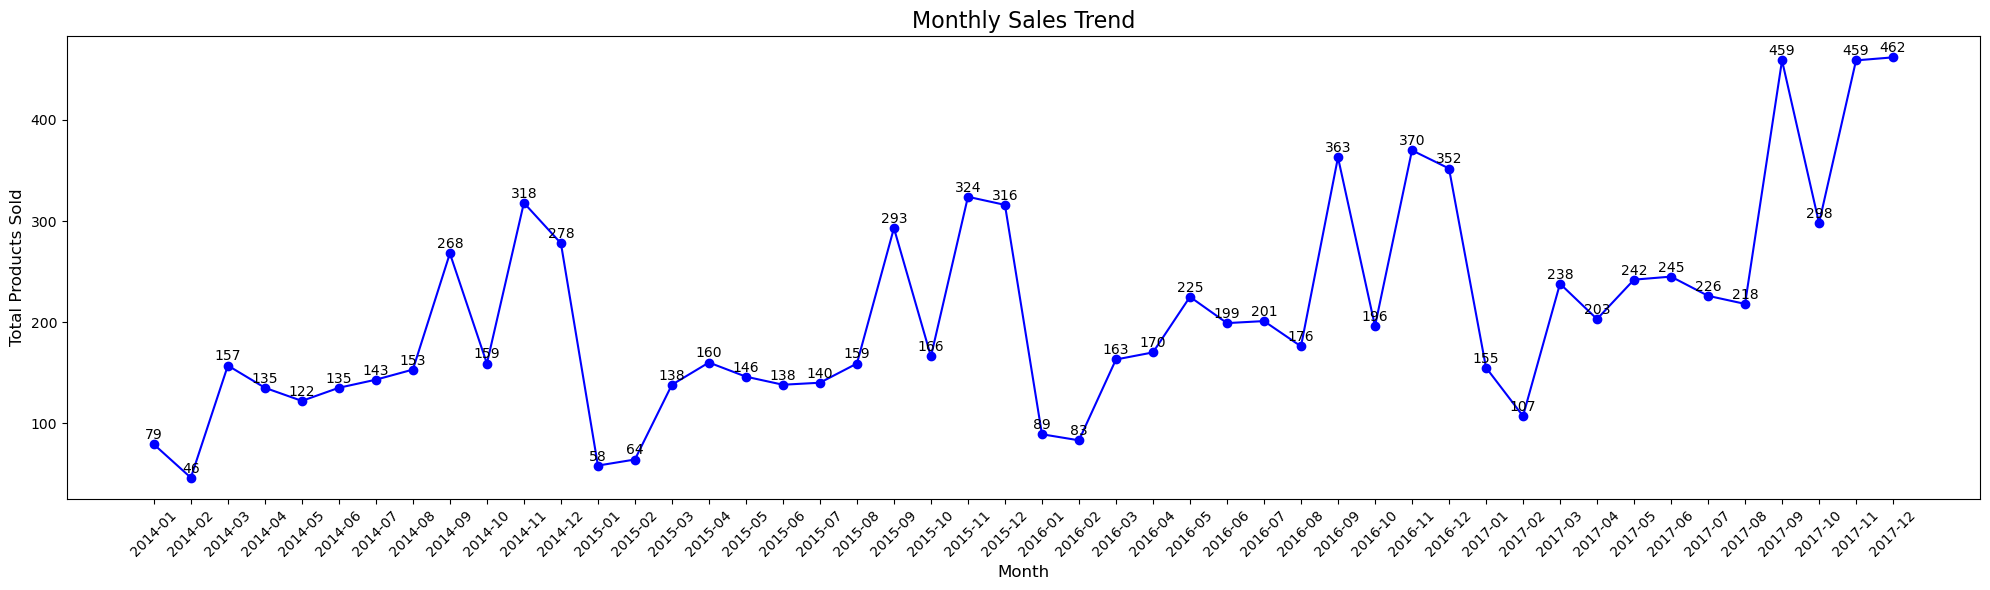

In [101]:
# Tambahkan kolom bulan dan tahun untuk analisis tren
merged_data['Year_Month'] = merged_data['Order Date'].dt.to_period('M')

# Hitung jumlah produk terjual per bulan (Total Sales)
monthly_sales = merged_data.groupby('Year_Month').agg(
    Total_Sales=('Category', 'count')  # Hitung jumlah produk terjual per bulan
).reset_index()

# Membuat grafik Tren Penjualan per Bulan
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales['Year_Month'].astype(str), monthly_sales['Total_Sales'], marker='o', linestyle='-', color='b')

# Menambahkan jumlah penjualan di atas setiap titik
for i, row in monthly_sales.iterrows():
    plt.text(i, row['Total_Sales'] + 5, f"{row['Total_Sales']}", ha='center', fontsize=10)

# Menambahkan label dan judul
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Products Sold', fontsize=12)
plt.xticks(rotation=45)  # Agar label bulan tidak saling tumpang tindih

# Menampilkan grafik
plt.tight_layout()
plt.show()

Berdasarkan data penjualan bulanan, terlihat bahwa ada beberapa bulan dengan jumlah penjualan yang signifikan lebih tinggi dibandingkan bulan lainnya:
- Puncak Penjualan terjadi pada April 2017 dengan 203 produk terjual, diikuti oleh Juli 2016 dengan 201 produk terjual, dan Juni 2016 dengan 199 produk terjual.
- Penurunan penjualan yang signifikan terlihat pada bulan Februari 2015 dengan hanya 64 produk terjual, yang merupakan salah satu angka terendah dalam data ini.
- Secara umum, penjualan di bulan awal tahun (Januari dan Februari) lebih rendah dibandingkan dengan bulan-bulan lainnya, terutama pada tahun-tahun sebelumnya.

Tren Penjualan:
- Penjualan tertinggi terjadi pada kuartal kedua tahun 2017, menunjukkan bahwa pelanggan lebih banyak berbelanja pada periode tersebut.
- Penurunan penjualan tercatat pada awal tahun dan beberapa bulan tertentu seperti Februari 2015, yang mungkin dipengaruhi oleh faktor musiman atau faktor pasar yang tidak menguntungkan pada waktu tersebut.

Rekomendasi:
1. Identifikasi apa yang menyebabkan peningkatan penjualan pada bulan April 2017 dan Juli 2016, seperti promosi atau produk tertentu. Dengan mengetahui penyebabnya, bisa lebih efektif dalam merencanakan kampanye atau strategi serupa untuk bulan-bulan dengan penjualan lebih rendah.

2. Januari, Februari, dan beberapa bulan lainnya memiliki penjualan rendah. Hal ini dapat dipertimbangkan untuk memperkenalkan penawaran atau diskon khusus selama periode ini untuk meningkatkan minat pelanggan, terutama dengan memanfaatkan momentum liburan atau musim tertentu.

3. Penurunan penjualan di beberapa bulan mungkin terkait dengan faktor musiman atau kebutuhan pasar yang berkurang. Untuk mengatasi ini, bisnis dapat menyesuaikan stok atau penawaran produk yang lebih relevan dengan musim atau tren pelanggan yang sedang berlaku.

4. Fokuskan pemasaran yang lebih intensif pada bulan-bulan dengan penjualan rendah, dan lakukan analisis lebih dalam untuk mengetahui alasan utama mengapa beberapa bulan cenderung lebih lemah dalam hal penjualan.

### Produk dengan penjualan terbanyak dan tersedikit.

In [106]:
# Hitung jumlah produk terjual per produk dalam setiap category
product_sales = merged_data.groupby(['Category', 'Product Name']).agg(
    Total_Sales=('Category', 'count')  # Menghitung jumlah produk terjual per produk
).reset_index()

# Inisialisasi dictionary untuk menyimpan hasil
top_3_products_category = {}
bottom_3_products_category = {}

# Melakukan iterasi per category untuk mendapatkan 3 produk terlaris dan paling sedikit terjual
for category in product_sales['Category'].unique():
    category_data = product_sales[product_sales['Category'] == category]
    
    # Mengurutkan berdasarkan Total Sales (jumlah produk terjual)
    sorted_data = category_data.sort_values(by='Total_Sales', ascending=False)
    
    # Ambil 3 produk terlaris (teratas)
    top_3_products_category[category] = sorted_data.head(3)[['Product Name', 'Total_Sales']]
    
    # Ambil 3 produk paling sedikit terjual (terbawah)
    bottom_3_products_category[category] = sorted_data.tail(3)[['Product Name', 'Total_Sales']]

# Menampilkan hasil analisis
for category in top_3_products_category:
    print(f"--- {category} ---")
    print("Top 3 Best Selling Products:")
    print(top_3_products_category[category], "\n")
    print("Top 3 Least Selling Products:")
    print(bottom_3_products_category[category], "\n")

--- Furniture ---
Top 3 Best Selling Products:
                                   Product Name  Total_Sales
257                  KI Adjustable-Height Table           18
355                  Staple-based wall hangings           16
351  Situations Contoured Folding Chairs, 4/Set           15 

Top 3 Least Selling Products:
                                                                 Product Name  \
24          Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops   
181              Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs   
54   Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled   

     Total_Sales  
24             1  
181            1  
54             1   

--- Office Supplies ---
Top 3 Best Selling Products:
           Product Name  Total_Sales
1144    Staple envelope           48
722   Easy-staple paper           46
1149            Staples           46 

Top 3 Least Selling Products:
                                         

Terdapat beberapa produk dengan penjualan yang baik dari setiap kategorinya. Selain itu terdapat beberapa produk yang penjualannya sangat sedikit. Untuk meningkatkan jumlah penjualan produk dan pendapatan, dapat dilakukan beberapa hal berikut:
- Memfokuskan lebih banyak upaya pada pemasaran dan peningkatan kualitas produk terlaris.
- Melakukan evaluasi menyeluruh terhadap produk yang kurang laku dan melakukan perbaikan atau reposisi pasar.
- Menyesuaikan harga dan strategi distribusi untuk memastikan produk tersedia untuk konsumen yang tepat pada waktu yang tepat.
Dengan mengikuti rekomendasi tersebut, perusahaan dapat meningkatkan penjualan, memperkuat posisi pasar, dan lebih efektif dalam memenuhi kebutuhan konsumen.

Di bawah ini merupakan beberapa list produk dengan penjualan tertinggi dan terendah dari setiap sub-category.

In [105]:
# Hitung jumlah produk terjual per produk dalam setiap sub-category
product_sales = merged_data.groupby(['Category', 'Sub-Category', 'Product Name']).agg(
    Total_Sales=('Category', 'count')  # Menghitung jumlah produk terjual per produk
).reset_index()

# Inisialisasi dictionary untuk menyimpan hasil
top_3_products = {}
bottom_3_products = {}

# Melakukan iterasi per sub-category untuk mendapatkan 3 produk terlaris dan paling sedikit terjual
for sub_category in product_sales['Sub-Category'].unique():
    sub_category_data = product_sales[product_sales['Sub-Category'] == sub_category]
    
    # Mengurutkan berdasarkan Total Sales (jumlah produk terjual)
    sorted_data = sub_category_data.sort_values(by='Total_Sales', ascending=False)
    
    # Ambil 3 produk terlaris (teratas)
    top_3_products[sub_category] = sorted_data.head(3)[['Product Name', 'Total_Sales']]
    
    # Ambil 3 produk paling sedikit terjual (terbawah)
    bottom_3_products[sub_category] = sorted_data.tail(3)[['Product Name', 'Total_Sales']]

# Menampilkan hasil analisis
for sub_category in top_3_products:
    print(f"--- {sub_category} ---")
    print("Top 3 Best Selling Products:")
    print(top_3_products[sub_category], "\n")
    print("Top 3 Least Selling Products:")
    print(bottom_3_products[sub_category], "\n")

--- Bookcases ---
Top 3 Best Selling Products:
                                                 Product Name  Total_Sales
30             O'Sullivan Living Dimensions 2-Shelf Bookcases           10
15  Bush Westfield Collection Bookcases, Medium Cherry Finish            9
5            Bush Andora Bookcase, Maple/Graphite Gray Finish            9 

Top 3 Least Selling Products:
                                                                 Product Name  \
13   Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled   
10  Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order   
6                            Bush Birmingham Collection Bookcase, Dark Cherry   

    Total_Sales  
13            1  
10            1  
6             1   

--- Chairs ---
Top 3 Best Selling Products:
                                        Product Name  Total_Sales
137       Situations Contoured Folding Chairs, 4/Set           15
88   Global Wood Trimmed Manager's Task Chair,

## Analisis Pelanggan

C:\Users\Dafa\AppData\Local\Temp\ipykernel_25048\2624528804.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Segment', y='Total_Sales', data=segment_summary, palette=colors)


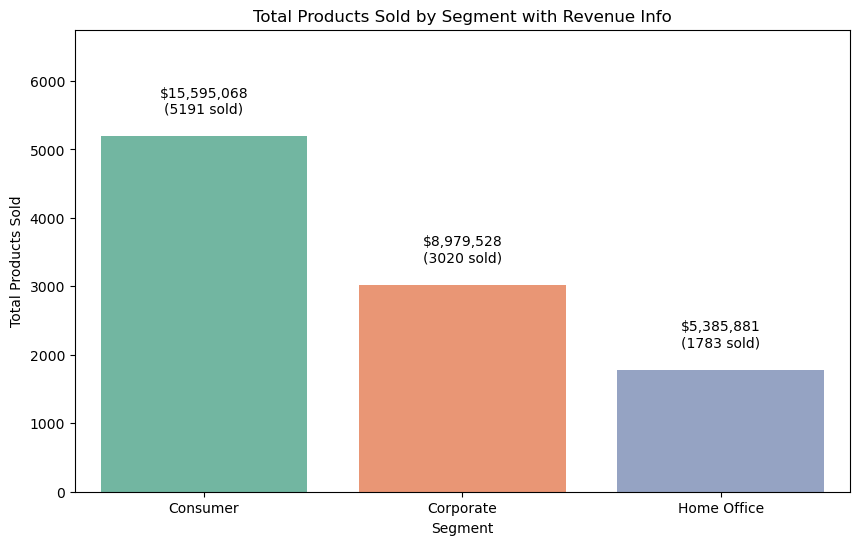

In [110]:
# Hitung total revenue (Price) dan total produk terjual (jumlah baris) per segment
segment_summary = merged_data.groupby('Segment').agg(
    Total_Revenue=('Price', 'sum'),  # Total revenue (pendapatan)
    Total_Sales=('Segment', 'count')  # Total jumlah produk terjual (jumlah baris)
).reset_index()

# Warna unik untuk setiap segment
colors = sns.color_palette("Set2", n_colors=segment_summary['Segment'].nunique())

# Membuat figure dan axes
plt.figure(figsize=(10, 6))

# Bar plot untuk Total Sales (Jumlah produk terjual) berdasarkan Segment
ax = sns.barplot(x='Segment', y='Total_Sales', data=segment_summary, palette=colors)

# Menentukan batas atas sumbu Y (lebih panjang)
y_max = segment_summary['Total_Sales'].max() * 1.3  # Tambahkan 30% dari nilai tertinggi
plt.ylim(0, y_max)

# Menambahkan keterangan Total Revenue & Total Sales di atas bar
for index, row in segment_summary.iterrows():
    plt.text(index, row.Total_Sales + (y_max * 0.05),  # Geser teks lebih ke atas
             f"${row.Total_Revenue:,.0f}\n({row.Total_Sales} sold)", ha='center', fontsize=10, color='black')

# Menyesuaikan tampilan
plt.xlabel('Segment')
plt.ylabel('Total Products Sold')
plt.title('Total Products Sold by Segment with Revenue Info')
# plt.xticks(rotation=45, ha='right')  # Agar label X tidak tumpang tindih
plt.show()

1. Segment Customer:
Segment Customer menunjukkan angka penjualan yang tinggi, ini menunjukkan bahwa konsumen individu memiliki minat yang besar terhadap produk. Produk yang banyak terjual di segment ini kemungkinan memiliki harga yang lebih terjangkau atau menawarkan kenyamanan, kemudahan, atau fitur yang sesuai dengan kebutuhan pribadi konsumen. Produk dalam segment ini bisa lebih beragam dan menargetkan berbagai kategori produk yang lebih spesifik.
    - Tambah variasi produk berdasarkan tren yang ada di pasar, misalnya produk yang berkaitan dengan tren gaya hidup, atau barang-barang kebutuhan sehari-hari.
    - Tingkatkan keterlibatan melalui pemasaran digital dan gunakan platform seperti media sosial untuk lebih dekat dengan konsumen.
    - Untuk produk yang kurang laku terjual, dapat dilakukan promo bundling dengan menargetkan segment customer ini.

2. Segment Corporate:
Segment Corporate menunjukkan penjualan menengah, hal ini bisa mengindikasikan bahwa produk yang ditawarkan sesuai untuk perusahaan, baik itu dari sisi kualitas, harga, atau kegunaan produk tersebut dalam kegiatan operasional perusahaan. Hal ini merupakan kesempatan untuk meningkatkan penawaran produk di segment ini, maka dapat dilakukan ebebrapa strategi berikut untuk dapat meningkatkan penjualan:
    - Lakukan penawaran khusus atau diskon untuk perusahaan yang membeli dalam jumlah besar.
    - Tingkatkan kampanye pemasaran dengan fokus pada manfaat produk untuk bisnis dan corporate (misalnya, efisiensi atau penghematan biaya).
    - Tenawarkan produk tambahan yang mendukung kebutuhan perusahaan, seperti perangkat teknologi atau furniture kantor yang lebih ergonomis.

3. Segment Home Office:
Untuk segment Home Office yang menunjukkan penjualan rendah, perlu dilakukan evaluasi lebih lanjut terkait penyebab rendahnya penjualan. Kemungkinan penyebabnya adalah ketidakcocokan dengan preferensi pengguna, kurangnya pengetahuan tentang produk, atau harga yang kurang kompetitif. Sehingga untuk meningkatkan penjualan di segment ini, perlu dilakukan:
    - Evaluasi desain produk dan harga produk untuk memastikan bahwa produk tersebut sesuai dengan kebutuhan pengguna di rumah.
    - Lakukan kampanye marketing yang lebih kuat, misalnya melalui iklan di platform yang sering digunakan oleh pekerja remote.
    - Beri diskon khusus atau bundling untuk mendorong pembelian produk terkait pekerjaan dari rumah, seperti furnitur atau peralatan teknologi.


C:\Users\Dafa\AppData\Local\Temp\ipykernel_25048\3324016055.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='State', x='Total_Sales', data=state_summary, palette=colors)


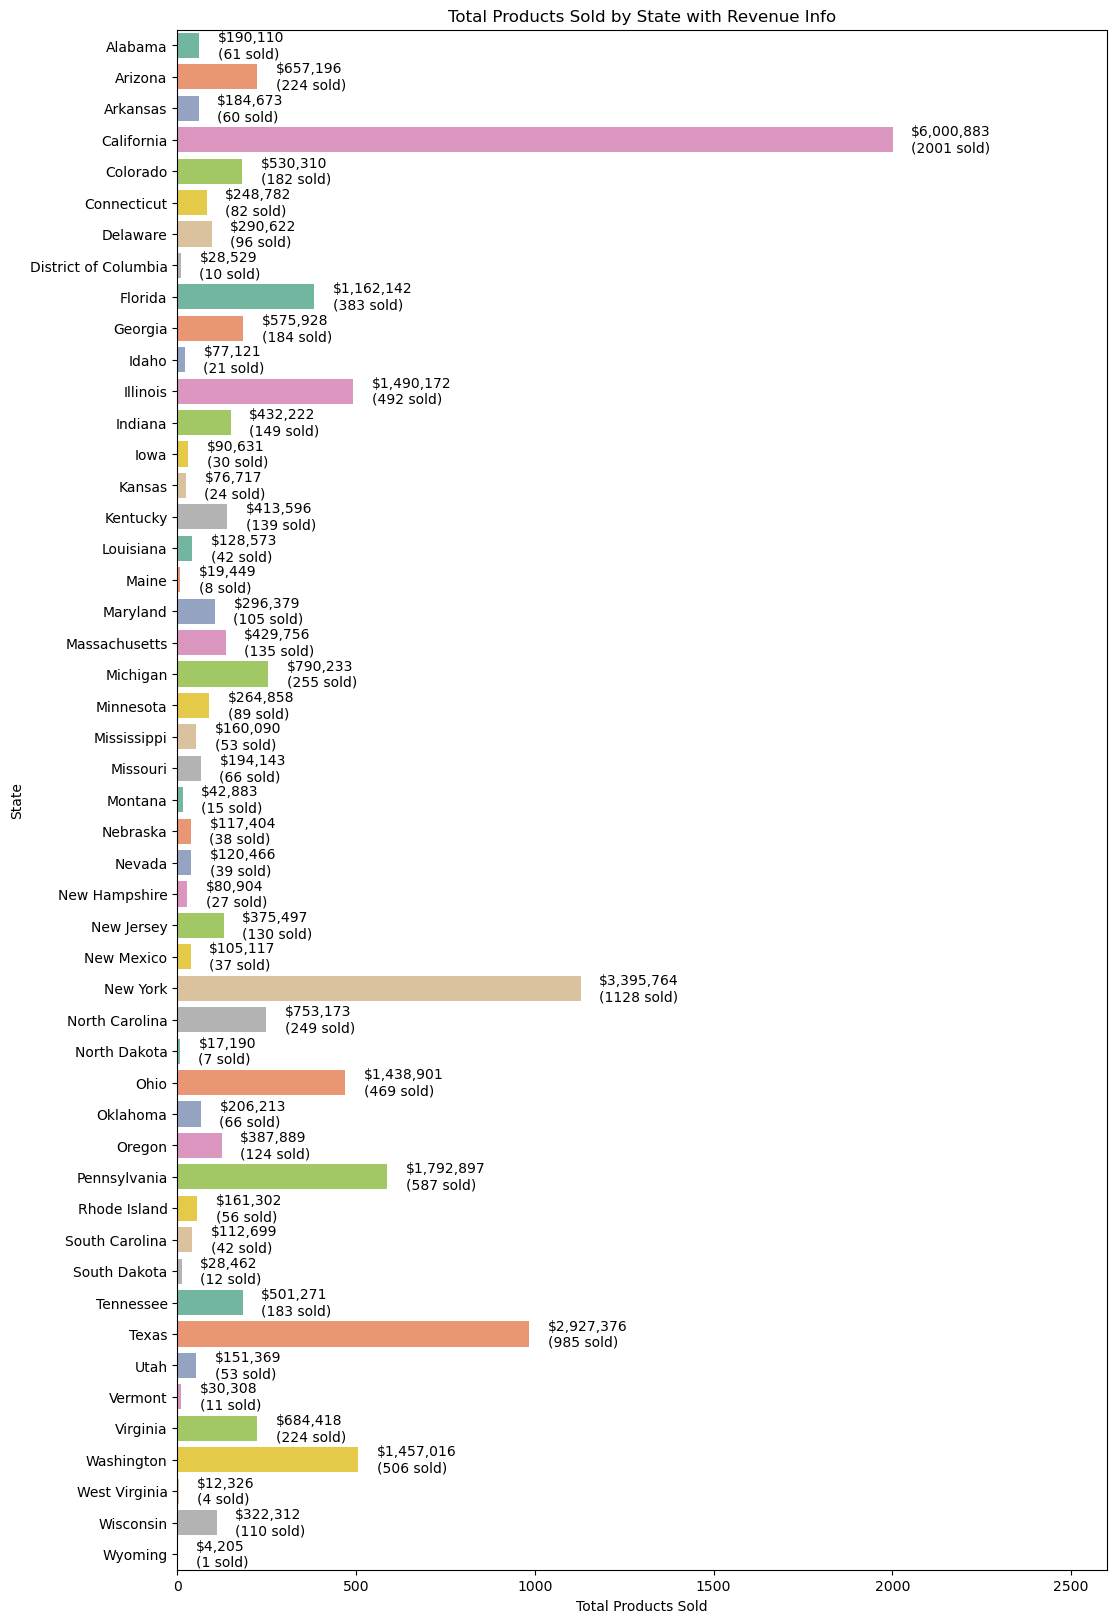

In [121]:
# Hitung total revenue (Price) dan total produk terjual (jumlah baris) per state
state_summary = merged_data.groupby('State').agg(
    Total_Revenue=('Price', 'sum'),  # Total revenue (pendapatan)
    Total_Sales=('State', 'count')  # Total jumlah produk terjual (jumlah baris)
).reset_index()

# Warna unik untuk setiap state
colors = sns.color_palette("Set2", n_colors=state_summary['State'].nunique())

# Membuat figure dan axes
plt.figure(figsize=(12, 20))

# Bar plot untuk Total Sales (Jumlah produk terjual) berdasarkan State
ax = sns.barplot(y='State', x='Total_Sales', data=state_summary, palette=colors)

# Menentukan batas kanan sumbu X (lebih panjang)
x_max = state_summary['Total_Sales'].max() * 1.3  # Tambahkan 30% dari nilai tertinggi
plt.xlim(0, x_max)

# Menambahkan keterangan Total Revenue & Total Sales di samping bar
for index, row in state_summary.iterrows():
    plt.text(row.Total_Sales + (x_max * 0.02), index,  # Geser teks lebih ke kanan
             f"${row.Total_Revenue:,.0f}\n({row.Total_Sales} sold)", va='center', fontsize=10, color='black')

# Menyesuaikan tampilan
plt.ylabel('State')
plt.xlabel('Total Products Sold')
plt.title('Total Products Sold by State with Revenue Info')
plt.show()

- California, New York, dan Texas menunjukkan penjualan yang tinggi, ini menandakan bahwa wilayah tersebut memiliki potensi pasar yang besar. Ini bisa disebabkan oleh tingginya permintaan, strategi pemasaran yang efektif, atau produk yang sangat diminati oleh konsumen di wilayah tersebut. Maka perusahaan bisa lebih fokus pada distribusi di wilayah tersebut dan mungkin menambah stok atau produk baru yang sesuai dengan preferensi lokal.

- Untuk negara bagian yang menunjukkan penjualan rendah, terutama penjualan < 50, itu bisa berarti ada kendala pemasaran, persaingan yang kuat, atau bahkan masalah dengan distribusi produk di wilayah tersebut. Maka perusahaan perlu dilakukan evaluasi pemasaran dan memastikan produk yang dijual relevan dengan kebutuhan konsumen di wilayah tersebut dan perbaiki strategi distribusi jika perlu. Selain itu, lalukan kampanye promosi atau penawaran diskon untuk menarik konsumen baru di wilayah yang kurang performa. Ini juga bisa meliputi penyesuaian harga atau bahkan penguatan kampanye digital yang lebih terfokus pada wilayah tersebut.

## Analisis Pengiriman

C:\Users\Dafa\AppData\Local\Temp\ipykernel_25048\3910584606.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Ship Mode', y='Total_Sales', data=ship_mode_summary, palette=colors)


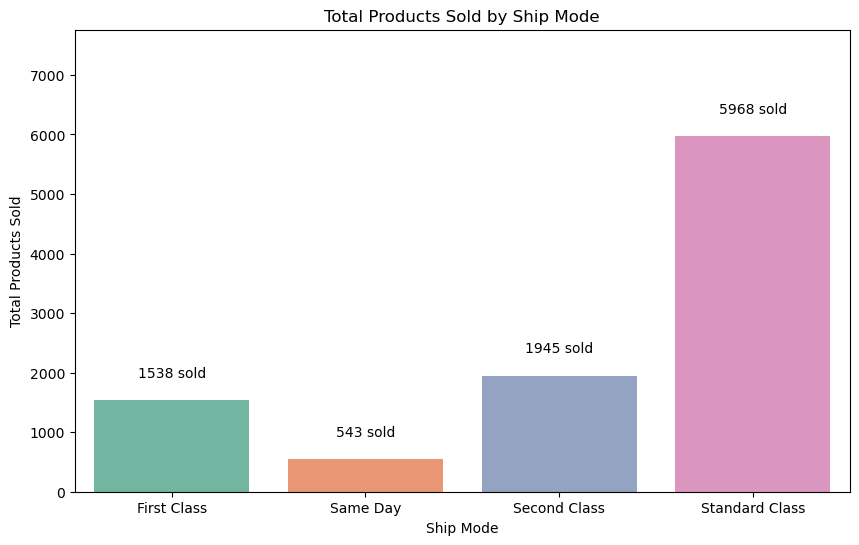

In [122]:
# Hitung total produk terjual (jumlah baris) per Ship Mode
ship_mode_summary = merged_data.groupby('Ship Mode').agg(
    Total_Sales=('Ship Mode', 'count')  # Total jumlah produk terjual (jumlah baris)
).reset_index()

# Warna unik untuk setiap Ship Mode
colors = sns.color_palette("Set2", n_colors=ship_mode_summary['Ship Mode'].nunique())

# Membuat figure dan axes
plt.figure(figsize=(10, 6))

# Bar plot untuk Total Sales (Jumlah produk terjual) berdasarkan Ship Mode
ax = sns.barplot(x='Ship Mode', y='Total_Sales', data=ship_mode_summary, palette=colors)

# Menentukan batas atas sumbu Y (lebih panjang)
y_max = ship_mode_summary['Total_Sales'].max() * 1.3  # Tambahkan 30% dari nilai tertinggi
plt.ylim(0, y_max)

# Menambahkan keterangan Total Sales di atas bar
for index, row in ship_mode_summary.iterrows():
    plt.text(index, row.Total_Sales + (y_max * 0.05),  # Geser teks lebih ke atas
             f"{row.Total_Sales} sold", ha='center', fontsize=10, color='black')

# Menyesuaikan tampilan
plt.xlabel('Ship Mode')
plt.ylabel('Total Products Sold')
plt.title('Total Products Sold by Ship Mode')
plt.show()

- Standard Class adalah Ship Mode yang paling banyak digunakan oleh pelanggan (5,968 produk terjual) menunjukkan bahwa sebagian besar pelanggan lebih memilih pengiriman standar. Ini bisa berarti bahwa pelanggan lebih cenderung memilih opsi yang lebih ekonomis dan tidak terburu-buru dalam menerima barang.

- Second Class mencatatkan 1,945 produk terjual, yang berarti pengiriman dalam waktu lebih cepat dibandingkan dengan Standard Class, namun tetap lebih murah dibandingkan First Class. Pilihan ini lebih populer daripada First Class dan Same Day, namun tidak sebesar Standard Class.

- First Class mencatatkan 1,538 produk terjual, menunjukkan bahwa ada permintaan untuk pengiriman lebih cepat, meskipun jumlahnya lebih rendah dibandingkan Standard Class dan Second Class. Ini mungkin digunakan oleh pelanggan yang membutuhkan produk lebih cepat tetapi tidak ingin membayar biaya Same Day.

- Same Day memiliki jumlah penjualan yang paling sedikit, hanya 543 produk terjual. Ini bisa berarti bahwa pelanggan lebih memilih opsi pengiriman yang sedikit lebih lambat jika itu mengurangi biaya, atau mungkin hanya ada sedikit pelanggan yang membutuhkan pengiriman pada hari yang sama.

Untuk meningkatkan penjualan dan memberikan kepuasan pada pelanggan, maka dapat dilakukan beberapa hal berikut:
1. Fokus pada Standard Class:
Karena Standard Class adalah pilihan yang paling populer, bisnis dapat mempertimbangkan untuk menawarkan lebih banyak diskon atau promosi untuk pelanggan yang memilih pengiriman ini. Hal ini dapat meningkatkan volume penjualan lebih lanjut.

2. Menjaga Ketersediaan Opsi Second Class:
Second Class menjadi pilihan kedua yang cukup populer, sehingga bisnis bisa fokus untuk menjaga waktu pengiriman yang wajar dan biaya yang lebih rendah dibandingkan dengan First Class. Hal ini mungkin menarik bagi pelanggan yang tidak mendesak tetapi masih menginginkan pengiriman yang lebih cepat dari Standard Class.

3. Evaluasi Pengiriman Same Day:
Same Day memiliki permintaan yang relatif rendah. Oleh karena itu, bisnis bisa mengevaluasi kembali biaya dan persyaratan untuk pengiriman ini. Bisa jadi pengiriman Same Day memerlukan biaya lebih tinggi atau lebih banyak kendala logistik, yang membatasi pelanggan yang memilihnya. Mungkin perlu ada penyesuaian dalam penentuan harga atau promosi untuk meningkatkan pilihan pengiriman ini.
4. Personalisasi Layanan Pengiriman:
Bisnis dapat mengadaptasi penawaran pengiriman berdasarkan segmentasi pelanggan. Misalnya, pelanggan yang sering membeli produk dengan pengiriman lebih cepat (First Class atau Same Day) bisa diberikan insentif atau program loyalitas.

5. Optimasi Rantai Pasokan:
Jika Same Day dan First Class memiliki lebih banyak permintaan pada periode tertentu, bisnis perlu memastikan kapasitas pengiriman dan stok produk untuk mendukung pengiriman cepat ini tanpa menurunkan kualitas layanan.

In [126]:
# Hitung selisih waktu antara Order Date dan Ship Date
merged_data['Shipping Duration'] = (merged_data['Ship Date'] - merged_data['Order Date']).dt.days

# Hitung rata-rata waktu pengiriman per Ship Mode
shipping_duration_by_mode = merged_data.groupby('Ship Mode')['Shipping Duration'].mean().reset_index()

# Tampilkan hasilnya
print(shipping_duration_by_mode)

        Ship Mode  Shipping Duration
0     First Class           2.182705
1        Same Day           0.044199
2    Second Class           3.238046
3  Standard Class           5.006535


Setelah menghitung rata-rata durasi pengiriman per Ship Mode, kita dapat menganalisis hasilnya. Berdasarkan informasi tersebut, Anda dapat memberikan insight mengenai kecepatan layanan pengiriman pada setiap mode:
1. Standard Class biasanya membutuhkan waktu pengiriman yang lebih lama karena tarifnya yang lebih rendah.
2. First Class mungkin memiliki waktu pengiriman lebih cepat dibandingkan Second Class.
3. Same Day seharusnya memiliki durasi pengiriman yang sangat cepat (dalam satu hari atau kurang).

Rekomendasi:
- Jika durasi pengiriman untuk Same Day ternyata lebih lama dari yang diharapkan, bisnis bisa mengevaluasi efisiensi proses logistiknya.
- Standard Class bisa difokuskan untuk pelanggan yang tidak terburu-buru, namun tetap harus mempertahankan kualitas pengiriman dalam jangka waktu yang wajar.